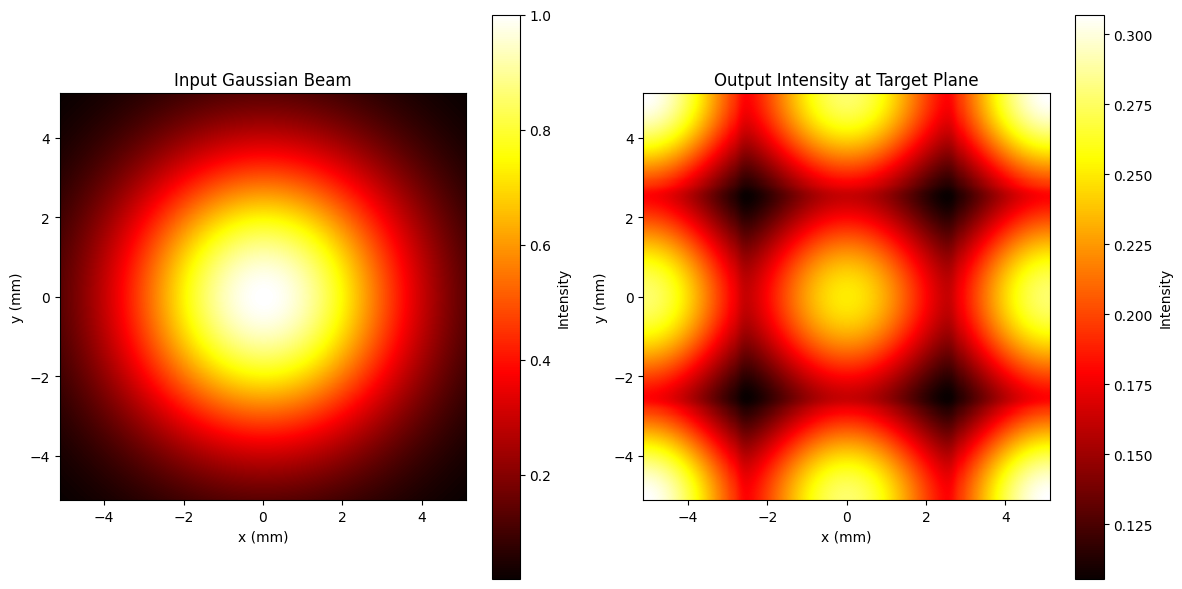

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mm = 1e-3  # millimeter to meter
nm = 1e-9  # nanometer to meter
lambda_ = 532 * nm  # wavelength
k = 2 * np.pi / lambda_  # wavenumber
n = 1.494  # refractive index of PMMA
SL = 10.24 * mm  # side length of aperture
N = 512  # number of grid samples
dx = SL / N  # sampling interval
d = 200 * mm  # propagation distance

# Spatial grid
x = np.linspace(-0.5 * SL, 0.5 * SL - dx, N)
y = np.linspace(-0.5 * SL, 0.5 * SL - dx, N)
X, Y = np.meshgrid(x, y)

# Input Gaussian beam
beam_waist = 5.12 * mm
I_input = np.exp(-2 * ((X / beam_waist) ** 2 + (Y / beam_waist) ** 2))

# FFT propagation using Angular Spectrum Method
def angular_spectrum(u0, L, lambda_, z):
    """Propagate field u0 over distance z using Angular Spectrum Method."""
    N = u0.shape[0]
    dx = L / N
    fx = np.fft.fftfreq(N, d=dx)
    FX, FY = np.meshgrid(fx, fx)
    H = np.exp(1j * k * z * np.sqrt(1 - (lambda_ * FX)**2 - (lambda_ * FY)**2))
    H = np.fft.fftshift(H)
    G0 = np.fft.fft2(np.fft.fftshift(u0))
    G1 = H * G0
    u1 = np.fft.ifftshift(np.fft.ifft2(G1))
    return u1

# Propagate beam
u1 = angular_spectrum(I_input, SL, lambda_, d)

# Intensity at the target plane
I_output = np.abs(u1) ** 2

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(I_input, extent=[-SL/2/mm, SL/2/mm, -SL/2/mm, SL/2/mm], cmap='hot')
plt.colorbar(label='Intensity')
plt.title("Input Gaussian Beam")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

plt.subplot(1, 2, 2)
plt.imshow(I_output, extent=[-SL/2/mm, SL/2/mm, -SL/2/mm, SL/2/mm], cmap='hot')
plt.colorbar(label='Intensity')
plt.title("Output Intensity at Target Plane")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

plt.tight_layout()
plt.show()
